In [8]:
import numpy as np

In [9]:
import pandas as pd

In [10]:
np.random.seed(42)

In [11]:
employee=[f'epy_{i}'for i in range(1,31)]

In [12]:
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")

In [13]:
employee

['epy_1',
 'epy_2',
 'epy_3',
 'epy_4',
 'epy_5',
 'epy_6',
 'epy_7',
 'epy_8',
 'epy_9',
 'epy_10',
 'epy_11',
 'epy_12',
 'epy_13',
 'epy_14',
 'epy_15',
 'epy_16',
 'epy_17',
 'epy_18',
 'epy_19',
 'epy_20',
 'epy_21',
 'epy_22',
 'epy_23',
 'epy_24',
 'epy_25',
 'epy_26',
 'epy_27',
 'epy_28',
 'epy_29',
 'epy_30']

In [15]:
data={
    "Date":np.tile(dates,len(employee)),
    "employee_id":np.repeat(employee,len(dates)),
    "working_hours":np.random.normal(loc=30,scale=5,size=len(dates)*len(employee))
}   

In [16]:
df=pd.DataFrame(data)

In [17]:
df

,Date,employee_id,working_hours
0,2025-07-01,epy_1,32.483571
1,2025-07-02,epy_1,29.308678
2,2025-07-03,epy_1,33.238443
3,2025-07-04,epy_1,37.615149
4,2025-07-05,epy_1,28.829233
...,...,...,...
895,2025-07-26,epy_30,33.243549
896,2025-07-27,epy_30,29.164410
897,2025-07-28,epy_30,30.733568
898,2025-07-29,epy_30,36.032545


In [18]:
df.to_csv("employee_working_hours.csv",index=False)

In [19]:
df_csv = pd.read_csv("employee_working_hours.csv")

In [20]:
df_csv

,Date,employee_id,working_hours
0,2025-07-01,epy_1,32.483571
1,2025-07-02,epy_1,29.308678
2,2025-07-03,epy_1,33.238443
3,2025-07-04,epy_1,37.615149
4,2025-07-05,epy_1,28.829233
...,...,...,...
895,2025-07-26,epy_30,33.243549
896,2025-07-27,epy_30,29.164410
897,2025-07-28,epy_30,30.733568
898,2025-07-29,epy_30,36.032545


In [22]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["employee_id"].nunique())

         Date employee_id  working_hours
0  2025-07-01       epy_1      32.483571
1  2025-07-02       epy_1      29.308678
2  2025-07-03       epy_1      33.238443
3  2025-07-04       epy_1      37.615149
4  2025-07-05       epy_1      28.829233
       working_hours
count     900.000000
mean       30.091926
std         4.904530
min        13.793663
25%        26.745590
50%        30.092131
75%        33.246901
max        49.263657
30


In [23]:
total_hours = df_csv.groupby("employee_id")["working_hours"].sum().sort_values(ascending=False)
print(total_hours)

employee_id
epy_30    962.606134
epy_21    949.712002
epy_11    942.282391
epy_6     941.817993
epy_13    934.225898
epy_29    931.906799
epy_26    928.785713
epy_28    922.726849
epy_10    916.074819
epy_20    913.164300
epy_7     909.838848
epy_8     907.205434
epy_16    906.985293
epy_14    904.314773
epy_27    903.784449
epy_3     901.932716
epy_4     896.962256
epy_24    894.304245
epy_15    891.394231
epy_19    886.585246
epy_5     885.756283
epy_2     881.825629
epy_23    880.485134
epy_22    879.695120
epy_9     878.485218
epy_1     871.777966
epy_17    870.315585
epy_25    869.284734
epy_12    869.016727
epy_18    849.480581
Name: working_hours, dtype: float64


In [24]:
avg_daily = df_csv.groupby("employee_id")["working_hours"].mean()

In [25]:
threshold_low =5
threshold_high = 9
df_csv["low_hours_flag"] = df_csv["working_hours"] < threshold_low
df_csv["high_hours_flag"] = df_csv["working_hours"] > threshold_high

print(df_csv[df_csv["low_hours_flag"] | df_csv["high_hours_flag"]].head())

         Date employee_id  working_hours  low_hours_flag  high_hours_flag
0  2025-07-01       epy_1      32.483571           False             True
1  2025-07-02       epy_1      29.308678           False             True
2  2025-07-03       epy_1      33.238443           False             True
3  2025-07-04       epy_1      37.615149           False             True
4  2025-07-05       epy_1      28.829233           False             True


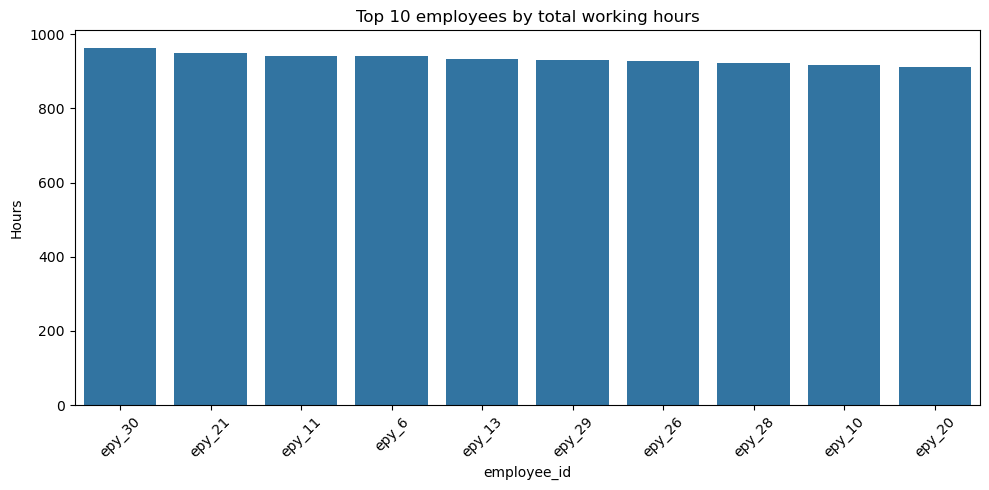

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

top10 = total_hours.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index, y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 employees by total working hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()